## DATA 601 Project-2
Due date: May 19, 2022. 23:59 pm.<br>
Groups will be determined at the April 29 class. <br>
<br>

For your second project, you will be working on the flights dataset that we used earlier. <br>
We have 5 csv files and 5 Excel files. You can learn more about the content of the csv files at <br>
https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf
<br>
<br>
<b> FILES (https://github.com/simsekergun/DATA601/tree/main/Project2/datasets) </b>
* flights2DCMDVA.xlsx (Note that this is a smaller version of the original NYCflights13.csv data) <br>
* airlines.csv <br>
* airports.csv <br>
* planes.csv <br>
* weatherNYhourly.csv (NY daily weather)<br>
* weatherMDdaily.xlsx (MD daily temperature/precip/snow data) <br>
* weatherNYdaily.xlsx (NY daily temperature/precip/snow data) <br>
* federal-holidays-2013.xlsx <br>
* flights_test_data.xlsx (only needed for Q4 and Q5)<br>

We are only interested in flights from NY to three local airports:
* IAD: Dulles International Airport
* BWI: Baltimore/Washington International Thurgood Marshall Airport
* DCA: Ronald Reagan Washington National Airport

After carrying out EAD, please work on the following questions. You will need to submit your notebook and report (as a pdf file). <br> 
The report should include
* Names of the students, Title of the project (e.g. DATA 601 | Project 2| NY-DC/MD/VA Flights), and date
* A brief introduction
* Clear answers to the questions. Make sure that you have enough number of images with proper figure captions and numbering.

Answer the following questions or complete the tasks <br>

#### Question/Task 1
a. Calculate the total number of seats for all the planned flights for each destination separately? <br>
b. What is the day of the year with the highest number of flights? <br>
c. What is the day of the year with the highest number of seats available on that day? <br>

#### Question/Task 2
a. What day of the year most cancellations happened? <br>
b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?<br>
e. Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)<br>


For the next group of questions/tasks, do not include the cancelled flights.

#### Question/Task 3
a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.<br>
b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)<br>
c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?<br>
d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)<br>
e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) <br>
f. What day of the week we had the highest average delay?<br>
g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?<br>
h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. <br>
<br>

#### Question/Task 4
Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy. 

#### Question/Task 5
Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.

# **Please upload the all files into google drive's Colab Notebooks folder ****


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sns
import datetime

In [ ]:
# uploading the data into the dataframes

from google.colab import drive

drive.mount('/content/drive')  

path1= "drive/MyDrive/Colab Notebooks/airlines.csv"         
airlines = pd.read_csv(path1)                            #airlines dataframe
print("airlines dataset \n",airlines.head())

path2= "drive/MyDrive/Colab Notebooks/airports.csv"
airports = pd.read_csv(path2)                            #airports dataframe
print("\n airports dataset \n",airports.head()) 

path3= "drive/MyDrive/Colab Notebooks/federal-holidays-2013.xlsx"
federalholidays = pd.read_excel(path3)                   #airports dataframe
federalholidays.columns = federalholidays.iloc[0]
federalholidays.drop([0],inplace=True, axis=0)
federalholidays= federalholidays[0:10]                   #removing extra rows on the top
federalholidays['Date']= federalholidays['Date'].apply(lambda x: datetime.datetime.strptime(x, '%B %d, %Y'))    #converting to datetime.
print("\n federalholidays-2013 dataset \n",federalholidays.head())

path4= "drive/MyDrive/Colab Notebooks/flights.csv"
flights = pd.read_csv(path4)                              #flights dataframe 
flights.drop(flights.columns[[0]], inplace=True, axis=1)
print("\n Flights dataset \n",flights.head())

path5= "drive/MyDrive/Colab Notebooks/flights2DCMDVA.xlsx"
flights2DCMDVA = pd.read_excel(path5)                      #flights2DCMDVA dataframe
flights2DCMDVA['Date']=pd.to_datetime(flights2DCMDVA[["year", "month", "day"]], infer_datetime_format=True)     #creating a date column using year, month and day.
flights2DCMDVA['day_of_year']= flights2DCMDVA['Date'].apply(lambda x: x.timetuple().tm_yday)       #add day of the year (1:365)
print("\n flights to DC,MD,VA dataset \n",flights2DCMDVA.head())

path6= "drive/MyDrive/Colab Notebooks/planes.csv"         
planes = pd.read_csv(path6)                               #planes dataframe
print("\n planes dataset \n",planes.head())

path7= "drive/MyDrive/Colab Notebooks/weatherMDdaily.xlsx"
weatherMDdaily = pd.read_excel(path7)                     #weatherMDdaily dataframe
print("\n weatherMDdaily dataset \n",weatherMDdaily.head())

path8= "drive/MyDrive/Colab Notebooks/weatherNYdaily.xlsx"
weatherNYdaily = pd.read_excel(path8)                      #weatherNYdaily dataframe
print("\n weatherNYdaily dataset \n",weatherNYdaily.head())

path9= "drive/MyDrive/Colab Notebooks/weatherNYhourly.csv"
weatherNYhourly = pd.read_csv(path9)                       #weatherNYdaily dataframe
print("\n weatherNYhourly dataset \n",weatherNYhourly.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
airlines dataset 
   carrier                    name
0      9E       Endeavor Air Inc.
1      AA  American Airlines Inc.
2      AS    Alaska Airlines Inc.
3      B6         JetBlue Airways
4      DL    Delta Air Lines Inc.

 airports dataset 
    faa                           name        lat        lon   alt  tz dst  \
0  04G              Lansdowne Airport  41.130472 -80.619583  1044  -5   A   
1  06A  Moton Field Municipal Airport  32.460572 -85.680028   264  -6   A   
2  06C            Schaumburg Regional  41.989341 -88.101243   801  -6   A   
3  06N                Randall Airport  41.431912 -74.391561   523  -5   A   
4  09J          Jekyll Island Airport  31.074472 -81.427778    11  -5   A   

              tzone  
0  America/New_York  
1   America/Chicago  
2   America/Chicago  
3  America/New_York  
4  America/New_York  

 federalholidays-2013 dataset 


In [ ]:
#merging Flights2DCMDVA and Planes datasets

flights_planes=  flights2DCMDVA.merge(planes,how='left',left_on= 'tailnum', right_on= 'tailnum' )
flights_planes.rename(columns= {'year_x': 'year'}, inplace=True)
flights_planes.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,Date,day_of_year,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,...,2013-01-01,1,2007.0,Fixed wing multi engine,BOEING,737-7H4,2.0,140.0,NaN,Turbo-fan
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,...,2013-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,...,2013-01-01,1,1990.0,Fixed wing multi engine,BOEING,737-5H4,2.0,149.0,NaN,Turbo-jet
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,...,2013-01-01,1,2000.0,Fixed wing multi engine,BOEING,737-7H4,2.0,140.0,NaN,Turbo-fan
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,...,2013-01-01,1,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2.0,55.0,NaN,Turbo-fan


In [ ]:
#EDA

flights_planes.shape

(17166, 26)

In [ ]:
flights_planes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17166 entries, 0 to 17165
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          17166 non-null  int64         
 1   month         17166 non-null  int64         
 2   day           17166 non-null  int64         
 3   dep_time      16227 non-null  float64       
 4   dep_delay     16227 non-null  float64       
 5   arr_time      16180 non-null  float64       
 6   arr_delay     16164 non-null  float64       
 7   carrier       17166 non-null  object        
 8   tailnum       16791 non-null  object        
 9   flight        17166 non-null  int64         
 10  origin        17166 non-null  object        
 11  dest          17166 non-null  object        
 12  air_time      16164 non-null  float64       
 13  distance      17166 non-null  int64         
 14  hour          16227 non-null  float64       
 15  minute        16227 non-null  float6

In [ ]:
flights_planes.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute,day_of_year,year_y,engines,seats,speed
count,17166.0,17166.000000,17166.000000,16227.000000,16227.000000,16180.000000,16164.000000,17166.000000,16164.000000,17166.000000,16227.000000,16227.000000,17166.000000,14107.000000,14294.000000,14294.000000,10.0
mean,2013.0,6.244961,15.555983,1383.986874,13.155605,1497.763412,10.839396,3666.891530,45.743752,212.319352,13.489554,35.031429,174.301585,2001.411427,2.005597,90.832797,127.0
std,0.0,3.442076,8.741055,491.095434,41.697742,501.357545,45.410635,1390.491929,6.551112,14.252636,4.943119,19.029893,104.903414,3.838233,0.115160,57.603076,0.0
min,2013.0,1.000000,1.000000,2.000000,-32.000000,1.000000,-62.000000,63.000000,31.000000,169.000000,0.000000,0.000000,1.000000,1974.000000,1.000000,2.000000,127.0
25%,2013.0,3.000000,8.000000,956.000000,-6.000000,1109.000000,-13.000000,2187.000000,41.000000,212.000000,9.000000,19.000000,80.000000,1999.000000,2.000000,55.000000,127.0
50%,2013.0,6.000000,15.000000,1435.000000,-3.000000,1543.000000,-3.000000,3761.000000,45.000000,214.000000,14.000000,38.000000,172.000000,2000.000000,2.000000,55.000000,127.0
75%,2013.0,9.000000,23.000000,1819.000000,11.000000,1922.000000,16.000000,4418.000000,49.000000,228.000000,18.000000,53.000000,265.000000,2003.000000,2.000000,179.000000,127.0
max,2013.0,12.000000,31.000000,2400.000000,853.000000,2400.000000,851.000000,6181.000000,131.000000,229.000000,24.000000,59.000000,365.000000,2013.000000,4.000000,200.000000,127.0


In [ ]:
#task1 a.the total number of seats for all the planned flights for each destination separately

flights_planes.groupby(['dest'], as_index= False)['seats'].sum().sort_values('seats',ascending=True,ignore_index=True)

,dest,seats
0,BWI,96135.0
1,IAD,296004.0
2,DCA,906225.0


In [ ]:
#task1 b.the day of the year with the highest number of flights

day_num_flights= flights_planes.groupby(['Date','day_of_year'], as_index= False)['flight'].count().sort_values('flight',ascending=False,ignore_index=True)
#print("\n","On",day_num_flights["Date"].value_counts().idxmax(),"that is", day_num_flights["day_of_year"].value_counts().idxmax(),"day of the year the highest number of flights scheduled is",day_num_flights["flight"][0])  #highest number of flights based on day
day_num_flights[0:2]

,Date,day_of_year,flight
0,2013-01-17,17,61
1,2013-01-11,11,61


In [ ]:
#task1 c.the day of the year with the highest number of seats available on that day

day_seats= flights_planes.groupby(['Date','day_of_year'], as_index= False)['seats'].sum().sort_values('seats',ascending=False,ignore_index=True)
print("\n","On",day_seats['Date'].value_counts().idxmax(),"that is", day_seats["day_of_year"].value_counts().idxmax(),"day of the year the highest number of seats available is",day_seats["seats"][0])  #highest number of seats based on day




 On 2013-02-28 00:00:00 that is 59 day of the year the highest number of seats available is 5379.0


In [ ]:
#task2 a.which day of the year most cancellations happened

flights_planes['Cancelled']= np.where(flights_planes['hour'].isnull(),1,0)
flights_cancel = flights_planes.groupby(['Date','day_of_year'],as_index=False)['Cancelled'].sum().sort_values('Cancelled',ascending=False,ignore_index=True)

print(flights_cancel)
print("\n on", flights_cancel['Date'][0],"that is",flights_cancel['day_of_year'][0],"day of the year the most cancellations happened are",flights_cancel['Cancelled'][0] )


          Date  day_of_year  Cancelled
0   2013-03-06           65         46
1   2013-02-08           39         33
2   2013-09-12          255         25
3   2013-03-08           67         23
4   2013-05-23          143         21
..         ...          ...        ...
360 2013-07-04          185          0
361 2013-07-05          186          0
362 2013-07-15          196          0
363 2013-07-16          197          0
364 2013-12-31          365          0

[365 rows x 3 columns]

 on 2013-03-06 00:00:00 that is 65 day of the year the most cancellations happened are 46


In [ ]:
#task2 b. Is there any relationship between the weather datasets and cancellations (hypothesis testing).

weatherMDdaily['Precipitation']= weatherMDdaily['Precipitation'].replace('T',0)
weatherMDdaily['Snowfall']= weatherMDdaily['Snowfall'].replace('T',0)
weatherMDdaily['Snow Depth']= weatherMDdaily['Snow Depth'].replace('T',0)

weatherMDdaily.head()


flights_weather=  flights_cancel.merge(weatherMDdaily,how='left',left_on= 'Date', right_on= 'Date' )

flights_weather


,Date,day_of_year,Cancelled,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-03-06,65,46,40,33,0.75,0.0,0
1,2013-02-08,39,33,42,33,0.24,0.0,0
2,2013-09-12,255,25,89,70,0.65,0.0,0
3,2013-03-08,67,23,49,33,0.00,0.0,0
4,2013-05-23,143,21,80,65,0.99,0.0,0
...,...,...,...,...,...,...,...,...
360,2013-07-04,185,0,88,73,0.00,0.0,0
361,2013-07-05,186,0,89,74,0.00,0.0,0
362,2013-07-15,196,0,95,72,0.00,0.0,0
363,2013-07-16,197,0,95,75,0.00,0.0,0


In [ ]:
#hypothesis testing

from scipy import stats

#null hypothesis1:  the Precipitation has no affect on the flight Cancellation
corr_preci = stats.spearmanr(flights_weather['Cancelled'], flights_weather['Precipitation'])

if corr_preci.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_preci.pvalue,", we cannot reject null hypothesis: the Precipitation has no affect on the flight Cancellation")
else:
  print("spearmanr Correlation: %.3f" % corr_preci.pvalue,", we reject null hypothesis: the Precipitation has affect on the flight Cancellation")


#null hypothesis2:  the Snowfall has no affect on the flight Cancellation
corr_Snowfall = stats.spearmanr(flights_weather['Cancelled'], flights_weather['Snowfall'])

if corr_Snowfall.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_Snowfall.pvalue,",  we cannot reject null hypothesis: the Snowfall has no affect on the flight Cancellation")
else:
  print("spearmanr Correlation: %.3f" % corr_Snowfall.pvalue,", we reject null hypothesis: the Snowfall has affect on the flight Cancellation")


#null hypothesis3:  the Snow Depth has no affect on the flight Cancellation
corr_snowdep = stats.spearmanr(flights_weather['Cancelled'], flights_weather['Snow Depth'])

if corr_snowdep.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_snowdep.pvalue,", we cannot reject null hypothesis: the Snow Depth has no affect on the flight Cancellation")
else:
  print("spearmanr Correlation: %.3f" % corr_snowdep.pvalue,", we reject null hypothesis: the Snow Depth has affect on the flight Cancellation")


#null hypothesis4:  the Min Temp has no affect on the flight Cancellation
corr_mintemp = stats.spearmanr(flights_weather['Cancelled'], flights_weather['Min Temp'])

if corr_mintemp.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_mintemp.pvalue,", we cannot reject null hypothesis: the Min Temp has no affect on the flight Cancellation")
else:
  print("spearmanr Correlation: %.3f" % corr_mintemp.pvalue,", we reject null hypothesis: the Min Temp has affect on the flight Cancellation")


#null hypothesis5:  the Max Temp has no affect on the flight Cancellation
corr_maxtemp = stats.spearmanr(flights_weather['Cancelled'], flights_weather['Max Temp'])

if corr_maxtemp.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_maxtemp.pvalue,", we cannot reject null hypothesis: the Max Temp has no affect on the flight Cancellation")
else:
  print("spearmanr Correlation: %.3f" % corr_maxtemp.pvalue,", we reject null hypothesis: the Max Temp has affect on the flight Cancellation")



spearmanr Correlation: 0.000 , we reject null hypothesis: the Precipitation has affect on the flight Cancellation
spearmanr Correlation: 0.027 , we reject null hypothesis: the Snowfall has affect on the flight Cancellation
spearmanr Correlation: 0.861 , we cannot reject null hypothesis: the Snow Depth has no affect on the flight Cancellation
spearmanr Correlation: 0.086 , we cannot reject null hypothesis: the Min Temp has no affect on the flight Cancellation
spearmanr Correlation: 0.752 , we cannot reject null hypothesis: the Max Temp has no affect on the flight Cancellation


In [ ]:
#task2 c. Is there any relationship between the Federal Holiday Schedule and cancellations (hypothesis testing).

federalholidays['holiday']= 1
federalholidays

,Date,Federal holiday,Day of the week,holiday
1,2013-01-01,New Year's Day,Tuesday,1
2,2013-01-21,Martin Luther King Day,Monday,1
3,2013-02-18,Presidents' Day,Monday,1
4,2013-05-27,Memorial Day,Monday,1
5,2013-07-04,Independence Day,Thursday,1
6,2013-09-02,Labor Day,Monday,1
7,2013-10-14,Columbus Day,Monday,1
8,2013-11-11,Veterans Day,Monday,1
9,2013-11-28,Thanksgiving Day,Thursday,1
10,2013-12-25,Christmas Day,Wednesday,1


In [ ]:
flights_holiday=  flights_cancel.merge(federalholidays,how='left',left_on= 'Date', right_on= 'Date' )
flights_holiday= flights_holiday[['Date','holiday','Cancelled']]
flights_holiday['holiday'].fillna(0,inplace= True)
flights_holiday

,Date,holiday,Cancelled
0,2013-03-06,0.0,46
1,2013-02-08,0.0,33
2,2013-09-12,0.0,25
3,2013-03-08,0.0,23
4,2013-05-23,0.0,21
...,...,...,...
360,2013-07-04,1.0,0
361,2013-07-05,0.0,0
362,2013-07-15,0.0,0
363,2013-07-16,0.0,0


In [ ]:
#null hypothesis:  the holiday has no affect on the flight Cancellation

corr_holi = stats.spearmanr(flights_holiday['Cancelled'], flights_holiday['holiday'])
if corr_holi.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_holi.pvalue,", we cannot reject null hypothesis: the holiday has no affect on the flight Cancellation")
else:
  print("spearmanr Correlation: %.3f" % corr_holi.pvalue,", we reject null hypothesis: the holiday has affect on the flight Cancellation")


spearmanr Correlation: 0.162 , we cannot reject null hypothesis: the holiday has no affect on the flight Cancellation


In [ ]:
#task2 d.What is the total number of seats for the cancelled flights? 
#If we assume the average flight price of $50, what is the total economis loss?

flights_planes['Cancelled']= np.where(flights_planes['dep_time'].isna(),1,0)

tot_seats_cancel = flights_planes[flights_planes['Cancelled']==1]['seats'].sum()

print("the total number of seats for the cancelled flights are",tot_seats_cancel)
print("the total number economic loss is $",tot_seats_cancel*50)

the total number of seats for the cancelled flights are 24032.0
the total number economic loss is $ 1201600.0


In [ ]:
#task2 e. Determine the ratio of cancelled flights/planned flights for each airline company, list it,
# determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)

flights_cancel_df = flights_planes[flights_planes['Cancelled']==1]               #dataframe with only cancelled flights information


flights_planned= flights_planes.groupby(['carrier'],as_index=False)['flight'].count()          #planned flights
flights_cancel= flights_cancel_df.groupby(['carrier'],as_index=False)['flight'].count()        #cancelled flights 

print("Flights planned are \n",flights_planned)
print("Flights cancelled are \n",flights_cancel)

merged_df= flights_planned.merge(flights_cancel, how='outer',left_on='carrier', right_on='carrier',suffixes=('_left', '_right')) #merging planned & cancelled flights on carrier column.

merged_df.fillna(0, inplace=True)        #filling nan's with 0

merged_df['Ratio']= merged_df['flight_right']/merged_df['flight_left']       # Ration= cancelled flights/ planned flights

merged_df_airlines= merged_df.merge(airlines, how='inner',left_on= 'carrier',right_on='carrier')    #merging the data with airlines
merged_df_airlines.rename(columns= {'flight_left': 'Flights_planned', 'flight_right':'Flights_cancelled' }, inplace=True)  #renaming the columns
final_merged = merged_df_airlines[['name','Flights_planned','Flights_cancelled', 'Ratio']].sort_values('Ratio', ascending= False, ignore_index= True)

print(final_merged)

print("the most reliable airline company are",final_merged['name'][9],",", 
      final_merged['name'][8] ,"&", final_merged['name'][7]) #these airlines haven't scheduled many flights, so if we consider withrespect to planned it is "JetBlue Airways"
print("the least reliable airline company is",final_merged['name'][0] )


Flights planned are 
   carrier  flight
0      9E    2592
1      B6     675
2      DL       2
3      EV    6110
4      MQ    2554
5      OO       1
6      UA       3
7      US    4710
8      WN     208
9      YV     311
Flights cancelled are 
   carrier  flight
0      9E     144
1      B6       8
2      EV     369
3      MQ     149
4      US     229
5      WN       8
6      YV      32
                       name  Flights_planned  Flights_cancelled     Ratio
0        Mesa Airlines Inc.              311               32.0  0.102894
1  ExpressJet Airlines Inc.             6110              369.0  0.060393
2                 Envoy Air             2554              149.0  0.058340
3         Endeavor Air Inc.             2592              144.0  0.055556
4           US Airways Inc.             4710              229.0  0.048620
5    Southwest Airlines Co.              208                8.0  0.038462
6           JetBlue Airways              675                8.0  0.011852
7      Delta Air Lin

In [ ]:
#task3 a.Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay).
# On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.

flights_notcancel = flights_planes[flights_planes['Cancelled']==0]
date_arrival_delay = flights_notcancel.groupby(['Date'], as_index=False)['arr_delay'].mean()
date_arrival_delay['day_of_year']= date_arrival_delay['Date'].apply(lambda x: x.timetuple().tm_yday)
date_arrival_delay['day_of_year'].astype(int)
print("the avg arrival delay on the same day:\n",date_arrival_delay)



the avg arrival delay on the same day:
           Date  arr_delay  day_of_year
0   2013-01-01  34.075000            1
1   2013-01-02  23.702128            2
2   2013-01-03   8.040816            3
3   2013-01-04   5.326531            4
4   2013-01-05  -8.538462            5
..         ...        ...          ...
360 2013-12-27   2.090909          361
361 2013-12-28   1.272727          362
362 2013-12-29  26.740741          363
363 2013-12-30  -5.275862          364
364 2013-12-31  17.318182          365

[365 rows x 3 columns]


Text(0.5, 1.0, 'average arrival delay for all the flights')

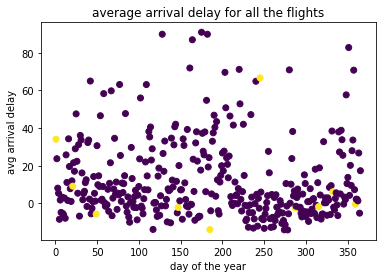

In [ ]:
#plotting the arr_delay & holidays on same graph.

holidayscopy = federalholidays.copy()      #creating a copy of federalholidays data
holidayscopy['holiday']= 1
holidayscopy= holidayscopy[['Date','holiday']]
date_arrival_delay['Date']=date_arrival_delay['Date'].astype(str)
holidayscopy['Date']=holidayscopy['Date'].astype(str)

df= date_arrival_delay.merge(holidayscopy, left_on= 'Date', right_on='Date', how='left')
df.fillna(0, inplace=True)
df.head()

plt.scatter(df['day_of_year'], df['arr_delay'], c=df['holiday'])

plt.xlabel('day of the year')
plt.ylabel('avg arrival delay')
plt.title('average arrival delay for all the flights')

In [ ]:
#task3 b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)

date_arrival_delay['Date']= date_arrival_delay['Date'].astype(str)
weatherMDdaily['Date']= weatherMDdaily['Date'].astype(str)
delay_weather=  date_arrival_delay.merge(weatherMDdaily,how='left',left_on= 'Date', right_on= 'Date' )
delay_weather


,Date,arr_delay,day_of_year,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,34.075000,1,44,34,0.00,0.0,0
1,2013-01-02,23.702128,2,37,26,0.00,0.0,0
2,2013-01-03,8.040816,3,38,22,0.00,0.0,0
3,2013-01-04,5.326531,4,42,23,0.00,0.0,0
4,2013-01-05,-8.538462,5,43,31,0.00,0.0,0
...,...,...,...,...,...,...,...,...
360,2013-12-27,2.090909,361,49,22,0.00,0.0,0
361,2013-12-28,1.272727,362,58,28,0.00,0.0,0
362,2013-12-29,26.740741,363,47,39,1.09,0.0,0
363,2013-12-30,-5.275862,364,47,32,0.00,0.0,0


In [ ]:
#null hypothesis1:  the Precipitation has no affect on the arr_delay
corr_preci = stats.spearmanr(delay_weather['arr_delay'], delay_weather['Precipitation'])

if corr_preci.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_preci.pvalue,", we cannot reject null hypothesis: the Precipitation has no affect on the arr_delay")
else:
  print("spearmanr Correlation: %.3f" % corr_preci.pvalue,", we reject null hypothesis: the Precipitation has affect on the arr_delay")


#null hypothesis2:  the Snowfall has no affect on the arr_delay
corr_Snowfall = stats.spearmanr(delay_weather['arr_delay'], delay_weather['Snowfall'])

if corr_Snowfall.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_Snowfall.pvalue,",  we cannot reject null hypothesis: the Snowfall has no affect on the arr_delay")
else:
  print("spearmanr Correlation: %.3f" % corr_Snowfall.pvalue,", we reject null hypothesis: the Snowfall has affect on the arr_delay")


#null hypothesis3:  the Snow Depth has no affect on the arr_delay
corr_snowdep = stats.spearmanr(delay_weather['arr_delay'], delay_weather['Snow Depth'])

if corr_snowdep.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_snowdep.pvalue,", we cannot reject null hypothesis: the Snow Depth has no affect on the arr_delay")
else:
  print("spearmanr Correlation: %.3f" % corr_snowdep.pvalue,", we reject null hypothesis: the Snow Depth has affect on the arr_delay")


#null hypothesis4:  the Min Temp has no affect on the arr_delay
corr_mintemp = stats.spearmanr(delay_weather['arr_delay'], delay_weather['Min Temp'])

if corr_mintemp.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_mintemp.pvalue,", we cannot reject null hypothesis: the Min Temp has no affect on the arr_delay")
else:
  print("spearmanr Correlation: %.3f" % corr_mintemp.pvalue,", we reject null hypothesis: the Min Temp has affect on the arr_delay")


#null hypothesis5:  the Max Temp has no affect on the arr_delay
corr_maxtemp = stats.spearmanr(delay_weather['arr_delay'], delay_weather['Max Temp'])

if corr_maxtemp.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_maxtemp.pvalue,", we cannot reject null hypothesis: the Max Temp has no affect on the arr_delay")
else:
  print("spearmanr Correlation: %.3f" % corr_maxtemp.pvalue,", we reject null hypothesis: the Max Temp has affect on the arr_delay")



spearmanr Correlation: 0.000 , we reject null hypothesis: the Precipitation has affect on the arr_delay
spearmanr Correlation: 0.046 , we reject null hypothesis: the Snowfall has affect on the arr_delay
spearmanr Correlation: 0.141 , we cannot reject null hypothesis: the Snow Depth has no affect on the arr_delay
spearmanr Correlation: 0.035 , we reject null hypothesis: the Min Temp has affect on the arr_delay
spearmanr Correlation: 0.746 , we cannot reject null hypothesis: the Max Temp has no affect on the arr_delay


In [ ]:
#task3 c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?


federalholidays['Date']=federalholidays['Date'].astype(str)
delay_holiday=  date_arrival_delay.merge(federalholidays,how='left',left_on= 'Date', right_on= 'Date' )
delay_holiday= delay_holiday[['Date','arr_delay','holiday']]
delay_holiday['holiday'].fillna(0,inplace= True)
delay_holiday

corr_holi = stats.spearmanr(date_arrival_delay['arr_delay'], delay_holiday['holiday'])
if corr_holi.pvalue > 0.05:
  print("spearmanr Correlation: %.3f" %  corr_holi.pvalue,", we cannot reject null hypothesis: the holiday has no affect on the arr_delay")
else:
  print("spearmanr Correlation: %.3f" % corr_holi.pvalue,", we reject null hypothesis: the holiday has affect on the arr_delay")


spearmanr Correlation: 0.353 , we cannot reject null hypothesis: the holiday has no affect on the arr_delay


In [ ]:
#task3 d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI)
# determine most and least reliables (most reliable = the one that has the shortest average delay)

flight_arr_del =flights_notcancel.groupby(['dest'], as_index= False)['arr_delay'].mean().sort_values('arr_delay',ascending=True,ignore_index=True)

print(flight_arr_del)
print("\n", flight_arr_del['dest'][0], "is the most reliable airport with",flight_arr_del['arr_delay'][0], "arrival delay")
print("\n", flight_arr_del['dest'][2], "is the least reliable airport with",flight_arr_del['arr_delay'][2], "arrival delay")



  dest  arr_delay
0  DCA   9.069106
1  BWI  10.745552
2  IAD  13.866071

 DCA is the most reliable airport with 9.06910569105691 arrival delay

 IAD is the least reliable airport with 13.866071428571429 arrival delay


In [ ]:
#task3 e.Calculate the average arrival delay for all the airlines 
#determine most and least reliables (most reliable = the one that has the shortest average delay) 

flights_airlines= flights_notcancel.merge(airlines, how='left', left_on='carrier', right_on='carrier')

flights_airlines.rename(columns= {'carrier_x': 'carrier'})

flights_airlines_arr_del= flights_airlines.groupby(['name'],as_index= False)['arr_delay'].mean().sort_values('arr_delay',ascending= True, ignore_index= True)

print(flights_airlines_arr_del)

print("\n", flights_airlines_arr_del['name'][0], "is the most reliable airline with",flights_airlines_arr_del['arr_delay'][0], "arrival delay")
print("\n", flights_airlines_arr_del['name'][9], "is the least reliable airline with",flights_airlines_arr_del['arr_delay'][9], "arrival delay")


                       name  arr_delay
0      Delta Air Lines Inc.  -8.000000
1     United Air Lines Inc.  -7.666667
2     SkyWest Airlines Inc.   3.000000
3         Endeavor Air Inc.   3.612890
4    Southwest Airlines Co.   4.915000
5           US Airways Inc.   5.829000
6                 Envoy Air  10.995401
7           JetBlue Airways  12.805097
8  ExpressJet Airlines Inc.  17.359776
9        Mesa Airlines Inc.  18.917266

 Delta Air Lines Inc. is the most reliable airline with -8.0 arrival delay

 Mesa Airlines Inc. is the least reliable airline with 18.91726618705036 arrival delay


In [ ]:
#task3 f. which day of the week we had the highest average delay

flights_notcancel['day_name']= flights_notcancel['Date'].dt.day_name()             # day_name of the week using date column.

flights_notcancel['Total_delay']= flights_notcancel['arr_delay']+ flights_notcancel['dep_delay']    #calculated the total delay
flightNYDCMDVA_seats_day_delay = flights_notcancel.groupby(['day_name'],as_index=False)['Total_delay'].mean().sort_values('Total_delay', ascending= False, ignore_index= True)

print(flightNYDCMDVA_seats_day_delay)

print("\n", flightNYDCMDVA_seats_day_delay['day_name'][0], "has the highest avg delay of", flightNYDCMDVA_seats_day_delay['Total_delay'][0],"\n")


    day_name  Total_delay
0     Monday    31.878318
1     Friday    27.150573
2   Thursday    25.847682
3  Wednesday    24.246785
4    Tuesday    22.618405
5     Sunday    17.027753
6   Saturday    14.488471

 Monday has the highest avg delay of 31.878317680685996 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#task3 g.Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?

flights_notcancel['took_off']= np.where((flights_notcancel['hour']>=6) & (flights_notcancel['hour']<11) , 'morning',        #creating a new column took_off
                                           np.where((flights_notcancel['hour']>=11) & (flights_notcancel['hour']<15) , 'noon',
                                           np.where((flights_notcancel['hour']>=15) & (flights_notcancel['hour']<18),  'afternoon','evening')))

flights_took_delay = flights_notcancel.groupby(['took_off'],as_index= False)['dep_delay'].mean().sort_values('dep_delay',ascending= False, ignore_index=True)
print(flights_took_delay)

print("\n",flights_took_delay['took_off'][0],"has the highest avg delay of",flights_took_delay['dep_delay'][0],"\n" )

    took_off  dep_delay
0    evening  23.043958
1  afternoon  19.393970
2       noon   8.073522
3    morning   1.836039

 evening has the highest avg delay of 23.04395821013207 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#task3 h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. 

flights_manufactered = flights_notcancel[(flights_notcancel['manufacturer']=='BOEING') |
                                           (flights_notcancel['manufacturer']=='EMBRAER') | (flights_notcancel['manufacturer']=='AIRBUS INDUSTRIE')]


print(flights_manufactered["manufacturer"].value_counts())



EMBRAER             4409
AIRBUS INDUSTRIE    3941
BOEING               201
Name: manufacturer, dtype: int64


# **Build a linear regression model to estimate the arrival delay of the flights**

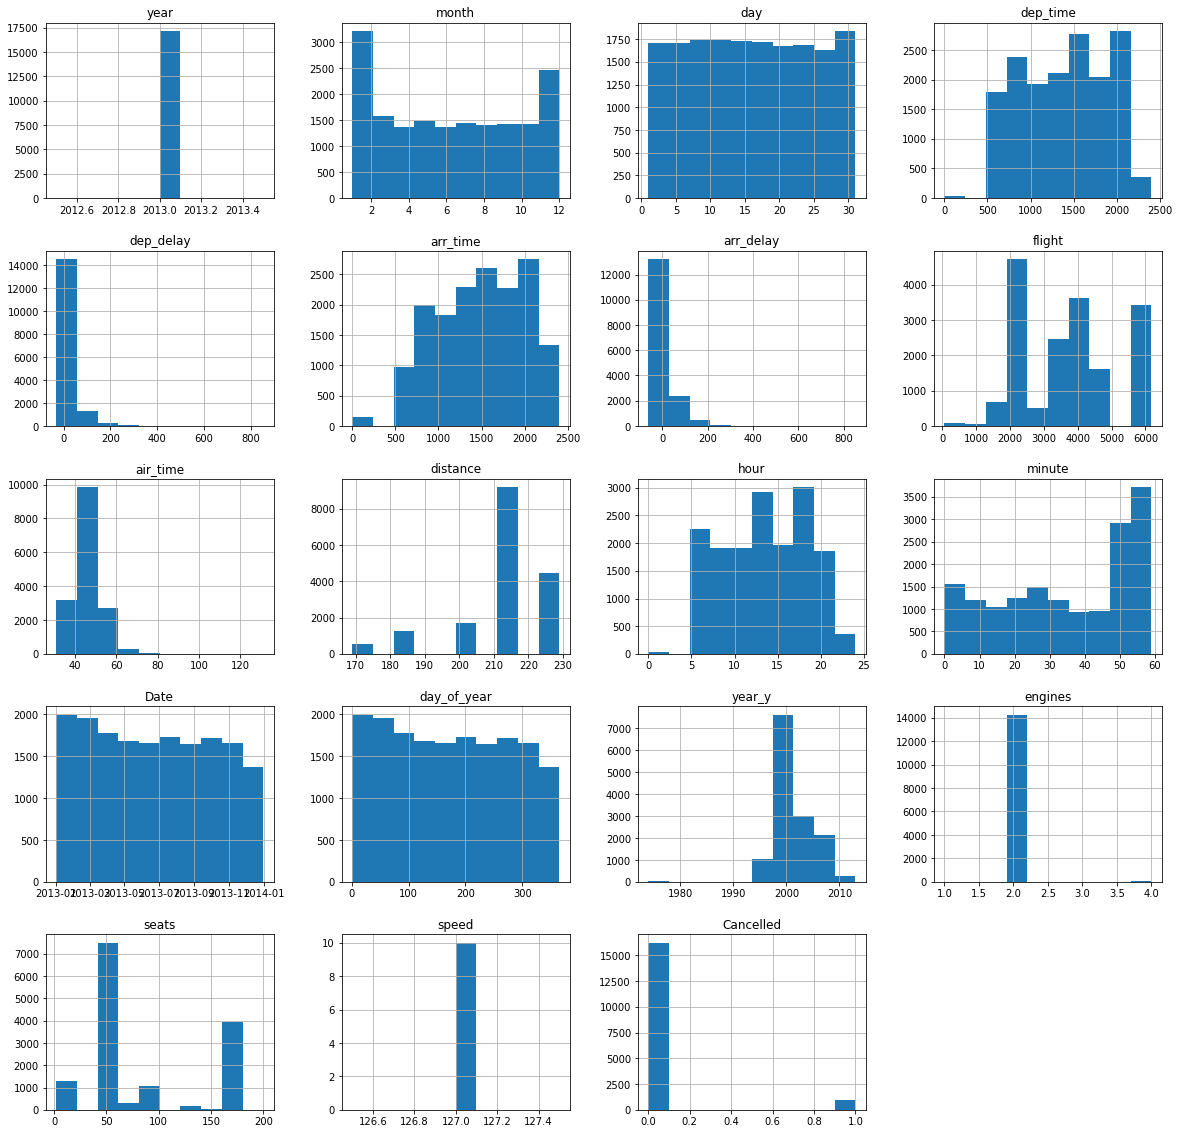

In [ ]:
#task4 Linear Regression

flights_planes.hist(figsize=(20,20))         #EDA
plt.show()

In [ ]:
# extracting only non cancelled flights data

flights_planes_lr= flights_planes[flights_planes['Cancelled']==0]

flights_planes_lr= flights_planes_lr[['year','month','day','carrier','origin','dest','distance','arr_delay']]

flights_planes_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16227 entries, 0 to 17165
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       16227 non-null  int64  
 1   month      16227 non-null  int64  
 2   day        16227 non-null  int64  
 3   carrier    16227 non-null  object 
 4   origin     16227 non-null  object 
 5   dest       16227 non-null  object 
 6   distance   16227 non-null  int64  
 7   arr_delay  16164 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.1+ MB


In [ ]:
flights_planes_lr.describe()

,year,month,day,distance,arr_delay
count,16227.0,16227.000000,16227.000000,16227.000000,16164.000000
mean,2013.0,6.270722,15.580637,212.294201,10.839396
std,0.0,3.446083,8.743645,14.258832,45.410635
min,2013.0,1.000000,1.000000,169.000000,-62.000000
25%,2013.0,3.000000,8.000000,212.000000,-13.000000
50%,2013.0,6.000000,16.000000,214.000000,-3.000000
75%,2013.0,9.000000,23.000000,228.000000,16.000000
max,2013.0,12.000000,31.000000,229.000000,851.000000


In [ ]:
#Data Transformations (Categorical to numberical labeling)

flights_planes_lr['origin']= flights_planes_lr['origin'].replace({'LGA': 0,'JFK': 1, 'EWR':2 })
flights_planes_lr['dest']= flights_planes_lr['dest'].replace({'BWI': 0,'DCA': 1, 'IAD':2 })
flights_planes_lr['carrier']= flights_planes_lr['carrier'].replace({'WN':0, 'MQ':1 , 'EV':2, '9E':3, 'US':4, 'DL':5, 'B6':6, 'YV':7, 'UA':8, 'OO':9})
flights_planes_lr['year']= flights_planes_lr['year'].replace({2013: 1})

flights_planes_lr.fillna(0,inplace=True)

In [ ]:
flights_planes_lr.describe()

,year,month,day,carrier,origin,dest,distance,arr_delay
count,16227.0,16227.000000,16227.000000,16227.000000,16227.000000,16227.000000,16227.000000,16227.000000
mean,1.0,6.270722,15.580637,2.782585,0.824428,1.227337,212.294201,10.797313
std,0.0,3.446083,8.743645,1.392452,0.743135,0.620153,14.258832,45.327405
min,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,169.000000,-62.000000
25%,1.0,3.000000,8.000000,2.000000,0.000000,1.000000,212.000000,-13.000000
50%,1.0,6.000000,16.000000,2.000000,1.000000,1.000000,214.000000,-3.000000
75%,1.0,9.000000,23.000000,4.000000,1.000000,2.000000,228.000000,16.000000
max,1.0,12.000000,31.000000,9.000000,2.000000,2.000000,229.000000,851.000000


In [ ]:
flights_planes_lr.head()

,year,month,day,carrier,origin,dest,distance,arr_delay
0,1,1,1,0,0,0,185,-19.0
1,1,1,1,1,1,0,184,851.0
2,1,1,1,0,0,0,185,-14.0
3,1,1,1,0,2,0,169,-4.0
4,1,1,1,2,2,0,169,-3.0


In [ ]:
# splitting the data set into training and testing

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


X= flights_planes_lr.drop(['arr_delay'],axis=1)
y= flights_planes_lr['arr_delay']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12981, 7)
(12981,)
(3246, 7)
(3246,)


In [ ]:
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_train_predict = lin_reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))          
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_pre = lin_reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pre)))
r2 = r2_score(y_test, y_test_pre)

print("The model performance for testing set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 44.949703807395544
R2 score is 0.010524299048232044


The model performance for testing set:
RMSE is 45.7371837695424
R2 score is 0.005898902110191395


In [ ]:
#feature selection
print("Feature data dimension: ", X.shape)

select = SelectKBest(score_func=f_regression, k=4)
z = select.fit_transform(X, y)
print("After selecting best k features:", z.shape)

Feature data dimension:  (16227, 7)
After selecting best k features: (16227, 4)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [ ]:
filter = select.get_support()
features = np.array(X.columns.tolist())
 
print("Selected best features:")
print(features[filter])

Selected best features:
['month' 'carrier' 'origin' 'dest']


In [ ]:
#Linear regression model using best features.

X_filtered = X.iloc[:,filter]
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state= 1)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
yhat = linreg.predict(X_train)

# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, yhat)))
r2 = r2_score(y_train, yhat)

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_hat = linreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_hat)))
r2 = r2_score(y_test, y_test_hat)

print("The model performance for testing set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:
RMSE is 44.976725867795324
R2 score is 0.00933427078428517


The model performance for testing set:
RMSE is 45.726487219373055
R2 score is 0.006363828367933477


In [ ]:
#Predicting flights_test_data using linear regression model

path10= "drive/MyDrive/Colab Notebooks/flights_test_data.xlsx"
flights_test = pd.read_excel(path10)                            


flights_test['origin']= flights_test['origin'].replace({'LGA': 0,'JFK': 1, 'EWR':2 })
flights_test['dest']= flights_test['dest'].replace({'BWI': 0,'DCA': 1, 'IAD':2 })
flights_test['carrier']= flights_test['carrier'].replace({'WN':0, 'MQ':1 , 'EV':2, '9E':3, 'US':4, 'DL':5, 'B6':6, 'YV':7, 'UA':8, 'OO':9})
flights_test['year']= flights_test['year'].replace({2013: 1})


test_filtered = flights_test.iloc[:,filter]

yhat_test= linreg.predict(test_filtered)

print(yhat_test)

[14.12055551 13.10929804 13.62030491  7.20388279 11.60854625 12.11955312
  7.56900637  5.703131   17.87553196  4.7026298  12.31372776  9.61830013
  3.7021286   7.67948311 15.87452957  3.20187801  7.60654147 15.87452957
  3.20187801 15.87452957]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

(12981, 9)
(12981,)
(3246, 9)
(3246,)
The model performance for training set:
RMSE is 14.724852224672027
R2 score is 0.8938174001211773


The model performance for testing set:
RMSE is 13.816751368380462
R2 score is 0.9092798835469041 




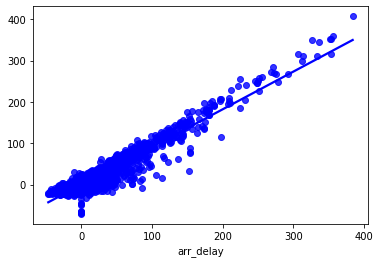

In [ ]:
#Above models accuracy is not great because of the features are not efficients to predict correctly
#If extra features are added accuracy will increase 
#but those features are missing in test data so will not be able to predict the model.

flights_planes_lr= flights_planes[flights_planes['Cancelled']==0]

flights_planes_lr1= flights_planes_lr[['year','month','day','carrier','origin','dest','distance','air_time','dep_delay','arr_delay']]

flights_planes_lr1['origin']= flights_planes_lr1['origin'].replace({'LGA': 0,'JFK': 1, 'EWR':2 })
flights_planes_lr1['dest']= flights_planes_lr1['dest'].replace({'BWI': 0,'DCA': 1, 'IAD':2 })
flights_planes_lr1['carrier']= flights_planes_lr1['carrier'].replace({'WN':0, 'MQ':1 , 'EV':2, '9E':3, 'US':4, 'DL':5, 'B6':6, 'YV':7, 'UA':8, 'OO':9})
flights_planes_lr1['year']= flights_planes_lr1['year'].replace({2013: 1})

flights_planes_lr1.fillna(0,inplace=True)

X_1= flights_planes_lr1.drop('arr_delay', axis=1)
y_1= flights_planes_lr1['arr_delay']


X1_train,X1_test,y1_train,y1_test = train_test_split(X_1,y_1, test_size= 0.2, random_state= 1)

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

linreg1 = LinearRegression()
linreg1.fit(X1_train, y1_train)
y_1hat = linreg1.predict(X1_train)

# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y1_train, y_1hat)))
r2 = r2_score(y1_train, y_1hat)

print("The model performance for training set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y1_test_hat = linreg1.predict(X1_test)
rmse = (np.sqrt(mean_squared_error(y1_test, y1_test_hat)))
r2 = r2_score(y1_test, y1_test_hat)

print("The model performance for testing set:")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2),"\n\n")                 #**accuracy increase due to dep_delay and air_time columns

sns.regplot(x=y1_test, y=y1_test_hat, ci=None, color="b")        #plotting the y_test & y_prediction

# **Build a logistic regression model to predict cancelled flights**

In [ ]:
#task5 Logistic regression.

flights_planes_cancel = flights_planes[flights_planes['Cancelled']==1]           #dataframe with only cancelled flights information
flights_planes_notcancel = flights_planes[flights_planes['Cancelled']==0]        #dataframe with only non-cancelled flights information.

flights_planes_nc_final= flights_planes_notcancel.sample(n=1000)                 #considering just a sample data for non-cancelled flights

flights_planes_lg= pd.concat([flights_planes_cancel,flights_planes_nc_final])   #concating the above two dataframes so that this dataset will be unbiased.


flights_planes_lg= flights_planes_lg[['year','month','day','carrier','origin','dest','distance','Cancelled']]     #columns as per test dataset

flights_planes_lg.info()
flights_planes_lg.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1939 entries, 136 to 6994
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       1939 non-null   int64 
 1   month      1939 non-null   int64 
 2   day        1939 non-null   int64 
 3   carrier    1939 non-null   object
 4   origin     1939 non-null   object
 5   dest       1939 non-null   object
 6   distance   1939 non-null   int64 
 7   Cancelled  1939 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 136.3+ KB


(1939, 8)

In [ ]:
#Data Transformations )converting categorical to numerical labeling).

flights_planes_lg['origin']= flights_planes_lg['origin'].replace({'LGA': 0,'JFK': 1, 'EWR':2 })
flights_planes_lg['dest']= flights_planes_lg['dest'].replace({'BWI': 0,'DCA': 1, 'IAD':2 })
flights_planes_lg['carrier']= flights_planes_lg['carrier'].replace({'WN':0, 'MQ':1 , 'EV':2, '9E':3, 'US':4, 'DL':5, 'B6':6, 'YV':7, 'UA':8, 'OO':9})
flights_planes_lg['year']= flights_planes_lg['year'].replace({2013: 1})
flights_planes_lg['Cancelled']= flights_planes_lg['Cancelled'].replace({1: 'yes',0: 'no'})

flights_planes_lg.fillna(0,inplace=True)

In [ ]:
flights_planes_lg.describe()

,year,month,day,carrier,origin,dest,distance
count,1939.0,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000,1939.000000
mean,1.0,6.052089,15.306859,2.710160,0.827746,1.227437,212.414647
std,0.0,3.410036,8.824467,1.367677,0.734126,0.620721,14.457486
min,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,169.000000
25%,1.0,3.000000,8.000000,2.000000,0.000000,1.000000,212.000000
50%,1.0,6.000000,14.000000,2.000000,1.000000,1.000000,214.000000
75%,1.0,9.000000,23.000000,4.000000,1.000000,2.000000,228.000000
max,1.0,12.000000,31.000000,7.000000,2.000000,2.000000,229.000000


In [ ]:
X1= flights_planes_lg.drop(['Cancelled'],axis=1)

y1= flights_planes_lg['Cancelled']

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1, test_size= 0.2, random_state= 1)

print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(1551, 7)
(1551,)
(388, 7)
(388,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train1,y_train1)
logreg.score(X_test1,y_test1)

0.520618556701031

In [ ]:
yhat1=logreg.predict(X_test1)

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, yhat1)
print(cm1)
total1=sum(sum(cm1))

#from confusion matrix calculate accuracy

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


[[120  89]
 [ 97  82]]
Accuracy :  0.520618556701031
Sensitivity :  0.5741626794258373
Specificity :  0.4581005586592179


In [ ]:
#feature selection
print("Feature data dimension: ", X1.shape)

select1 = SelectKBest(chi2, k=4)
z1 = select1.fit_transform(X1, y1)
print("After selecting best k features:", z1.shape)

Feature data dimension:  (1939, 7)
After selecting best k features: (1939, 4)


In [ ]:
filter1 = select1.get_support()
features1 = np.array(X1.columns.tolist())
 
print("Selected best features:")
print(features1[filter1])

Selected best features:
['month' 'day' 'carrier' 'distance']


In [ ]:
#model using best features.

X_filtered1 = X1.iloc[:,filter1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_filtered1, y1, test_size=0.2, random_state= 1)

logreg = LogisticRegression()
logreg.fit(X_train2,y_train2)
logreg.score(X_test2,y_test2)

yhat2=logreg.predict(X_test2)

cm2 = confusion_matrix(y_test2, yhat2)
print(cm2)
total2=sum(sum(cm2))

#from confusion matrix calculate accuracy

accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity2)

[[126  83]
 [ 91  88]]
Accuracy :  0.5515463917525774
Sensitivity :  0.5741626794258373
Specificity :  0.4581005586592179


In [ ]:
#predicting the cancellation for flights test dataset.   
                        
print("flights_test dataset \n",flights_test.head())

flights_test['origin']= flights_test['origin'].replace({'LGA': 0,'JFK': 1, 'EWR':2 })
flights_test['dest']= flights_test['dest'].replace({'BWI': 0,'DCA': 1, 'IAD':2 })
flights_test['carrier']= flights_test['carrier'].replace({'WN':0, 'MQ':1 , 'EV':2, '9E':3, 'US':4, 'DL':5, 'B6':6, 'YV':7, 'UA':8, 'OO':9})
flights_test['year']= flights_test['year'].replace({2013: 1})


test_filtered = flights_test.iloc[:,filter1]

yhat_test= logreg.predict(test_filtered)

print(yhat_test)

flights_test dataset 
    year  month  day  carrier  origin  dest  distance
0     1      1    6        1       1     1       213
1     1      1   25        2       0     2       229
2     1      2   11        1       1     1       213
3     1      4   14        4       0     1       214
4     1      4   29        2       0     2       229
['yes' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no']
